In [320]:
import pandas as pd

# https://www.propertypriceregister.ie/website/npsra/pprweb.nsf/page/ppr-home-en

In [321]:
df = pd.read_csv("C:\\Users\\santi\\OneDrive\\Desktop\\PPR-ALL.csv", encoding="unicode_escape")
#df = df.sample(100000)
df = df.reset_index()

C:\Users\santi\AppData\Local\Temp\ipykernel_31520\884126833.py:1: DtypeWarning: Columns (3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\Users\\santi\\OneDrive\\Desktop\\PPR-ALL.csv", encoding="unicode_escape")


In [322]:
df.head()

,index,Date of Sale (dd/mm/yyyy),Address,County,Eircode,Price (),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,NaN,"343,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
1,1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,NaN,"185,000.00",No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
2,2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,NaN,"438,500.00",No,No,Second-Hand Dwelling house /Apartment,NaN
3,3,04/01/2010,"1 The Haven, Mornington",Meath,NaN,"400,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
4,4,04/01/2010,"11 Melville Heights, Kilkenny",Kilkenny,NaN,"160,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN


In [323]:
df.shape

(597768, 10)

In [324]:
df.isna().sum()


index                             0
Date of Sale (dd/mm/yyyy)         0
Address                           0
County                            0
Eircode                      505249
Price ()                         0
Not Full Market Price             0
VAT Exclusive                     0
Description of Property           0
Property Size Description    544952
dtype: int64

In [325]:
df.columns

Index(['index', 'Date of Sale (dd/mm/yyyy)', 'Address', 'County', 'Eircode',
       'Price ()', 'Not Full Market Price', 'VAT Exclusive',
       'Description of Property', 'Property Size Description'],
      dtype='object')

In [326]:
df['Price'] = df['Price ()']
df['Price'] = df['Price'].str[1:]
df['Price'] = df['Price'].str.replace(',', '')
df['Address'] = df['Address'].str.replace('\d+', '')
df['Address'] = df['Address'].str.replace(',', '')
df['Address'] = df['Address'].str.upper()

C:\Users\santi\AppData\Local\Temp\ipykernel_31520\2904156962.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Address'] = df['Address'].str.replace('\d+', '')


dropped eircode explain why

In [327]:
df = df[['Address', 'County','Price','Description of Property']]

In [328]:
df['Price'] = df['Price'].astype('float')

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597768 entries, 0 to 597767
Data columns (total 4 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Address                  597768 non-null  object 
 1   County                   597768 non-null  object 
 2   Price                    597768 non-null  float64
 3   Description of Property  597768 non-null  object 
dtypes: float64(1), object(3)
memory usage: 18.2+ MB


In [330]:
df.County.unique()

array(['Dublin', 'Laois', 'Meath', 'Kilkenny', 'Limerick', 'Carlow',
       'Cork', 'Clare', 'Sligo', 'Cavan', 'Tipperary', 'Wicklow',
       'Roscommon', 'Wexford', 'Mayo', 'Donegal', 'Longford', 'Galway',
       'Offaly', 'Kildare', 'Waterford', 'Louth', 'Kerry', 'Westmeath',
       'Monaghan', 'Leitrim'], dtype=object)

Data transformation address

In [331]:
df['Address'].sample(20)

182470                      MOORD KINSALEBEG CO. WATERFORD.
17947                     BROWNSHILL WOOD BROWNSHILL CARLOW
269859                  CHURCHBORO BALLINLOUGH CO ROSCOMMON
513095                    CHARNWOOD GREEN CLONSILLA DUBLIN 
163352                   BLANCHFIELDS PARK CLIFDEN KILKENNY
183053                        CAMERON SQ KILMAINHAM DUBLIN 
457095                     MANORFIELDS CLOSE CLONEE DUBLIN 
288676                 MOUNT CARMEL ROAD LOUGHREA CO GALWAY
513433     THE COURTYARD KILDARE GOLF AND COUNTRY CLUB S...
391361                 MILVERTON HOUSE MONTGOMERY ST CARLOW
503536                              RATHGLASS TULLOW CARLOW
16841                      RINGCURRAN RISE ARDBRACK KINSALE
333076                 ASHWORTH PLACE HAROLDS CROSS DUBLIN 
432373                   THE OAKS BALLINAHINCH WOOD ASHFORD
410928                         APT  NEW BUILDING BECTIVE SQ
455045                        CHAMBERS PARK KILCOCK KILDARE
123350        CHARLESTOWN CENTRE ST MARG

In [332]:
df['Address'] = df['Address'].str.replace('\d+', '')
df['Address'] = df['Address'].str.replace(',', '')
df['Address'] = df['Address'].str.upper()

C:\Users\santi\AppData\Local\Temp\ipykernel_31520\316044791.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Address'] = df['Address'].str.replace('\d+', '')


In [333]:
df['Address'].sample(4)

38672           THORNVILLE AVENUE KILBARRACK
255960       THE HIBERNIAN BARROW ST DUBLIN 
571600     A COLLINS AVE EXTENSION WHITEHALL
263879     CLUAIN GLAS TEMPLEMORE RD THURLES
Name: Address, dtype: object

In [334]:
df.head()

,Address,County,Price,Description of Property
0,BRAEMOR DRIVE CHURCHTOWN CO.DUBLIN,Dublin,343000.0,Second-Hand Dwelling house /Apartment
1,ASHEWOOD WALK SUMMERHILL LANE PORTLAOISE,Laois,185000.0,New Dwelling house /Apartment
2,MEADOW AVENUE DUNDRUM DUBLIN,Dublin,438500.0,Second-Hand Dwelling house /Apartment
3,THE HAVEN MORNINGTON,Meath,400000.0,Second-Hand Dwelling house /Apartment
4,MELVILLE HEIGHTS KILKENNY,Kilkenny,160000.0,Second-Hand Dwelling house /Apartment


In [335]:
df['Description of Property'] = df['Description of Property'].str.replace('Second-Hand Dwelling house /Apartment', 'Second-Hand')
df['Description of Property'] = df['Description of Property'].str.replace('New Dwelling house /Apartment', 'New')
df['Description of Property'] = df['Description of Property'].str.replace('Teach/Árasán Cónaithe Atháimhe','Second-Hand')
df['Description of Property'] = df['Description of Property'].str.replace('Teach/Árasán Cónaithe Nua','New')
df = df[df['Description of Property'] != 'Teach/?ras?n C?naithe Nua']

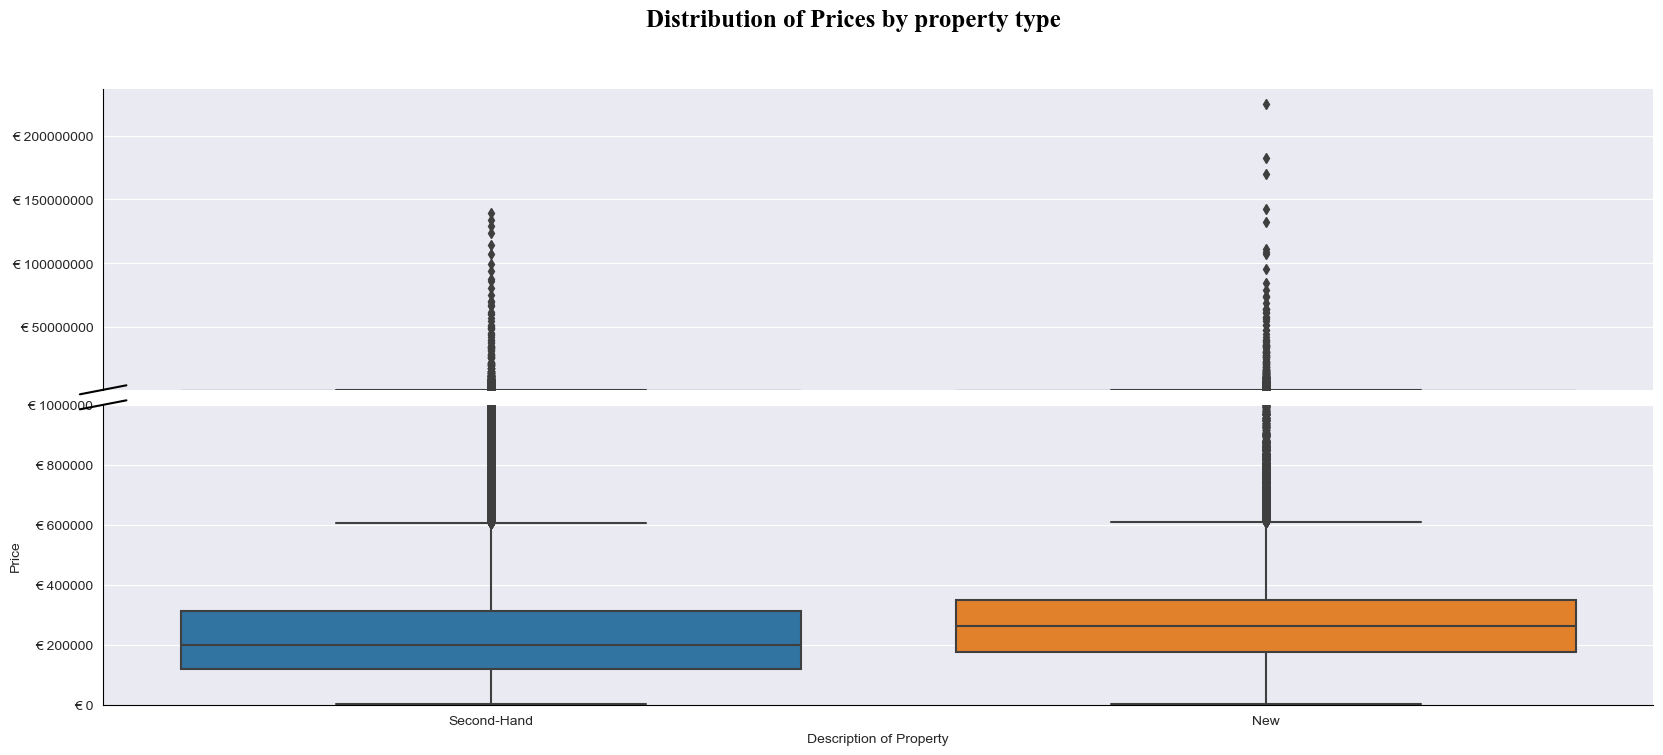

In [336]:
import matplotlib.pyplot as plt
import seaborn as sns

custom = {"axes.edgecolor": "black", "grid.color": "white"}
sns.set_style("darkgrid", rc = custom)

f, (ax_top, ax_bottom) = plt.subplots(ncols=1, nrows=2, sharex=True, gridspec_kw={'hspace':0.05},figsize=(20, 8))
f.suptitle('Distribution of Prices by property type',fontsize=18,color= "black", weight='bold',fontname="Times New Roman")
a = sns.boxplot(data=df,x='Description of Property',y='Price',ax=ax_bottom)
b = sns.boxplot(data=df,x='Description of Property',y='Price',ax=ax_top)
ax_top.set_ylim(bottom=1e6) 
ax_bottom.set_ylim(0,1e6)

sns.despine(ax=ax_bottom)
sns.despine(ax=ax_top, bottom=True)

ax = ax_top
d = .015
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)

ax2 = ax_bottom
kwargs.update(transform=ax2.transAxes)  
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs) 

ax_top.set(xlabel=None,ylabel=None)
b.ticklabel_format(style='plain', axis='y')
a.ticklabel_format(style='plain', axis='y')
ax_top.yaxis.set_major_formatter('€ {x:1.0f}')
ax_bottom.yaxis.set_major_formatter('€ {x:1.0f}')
plt.show()



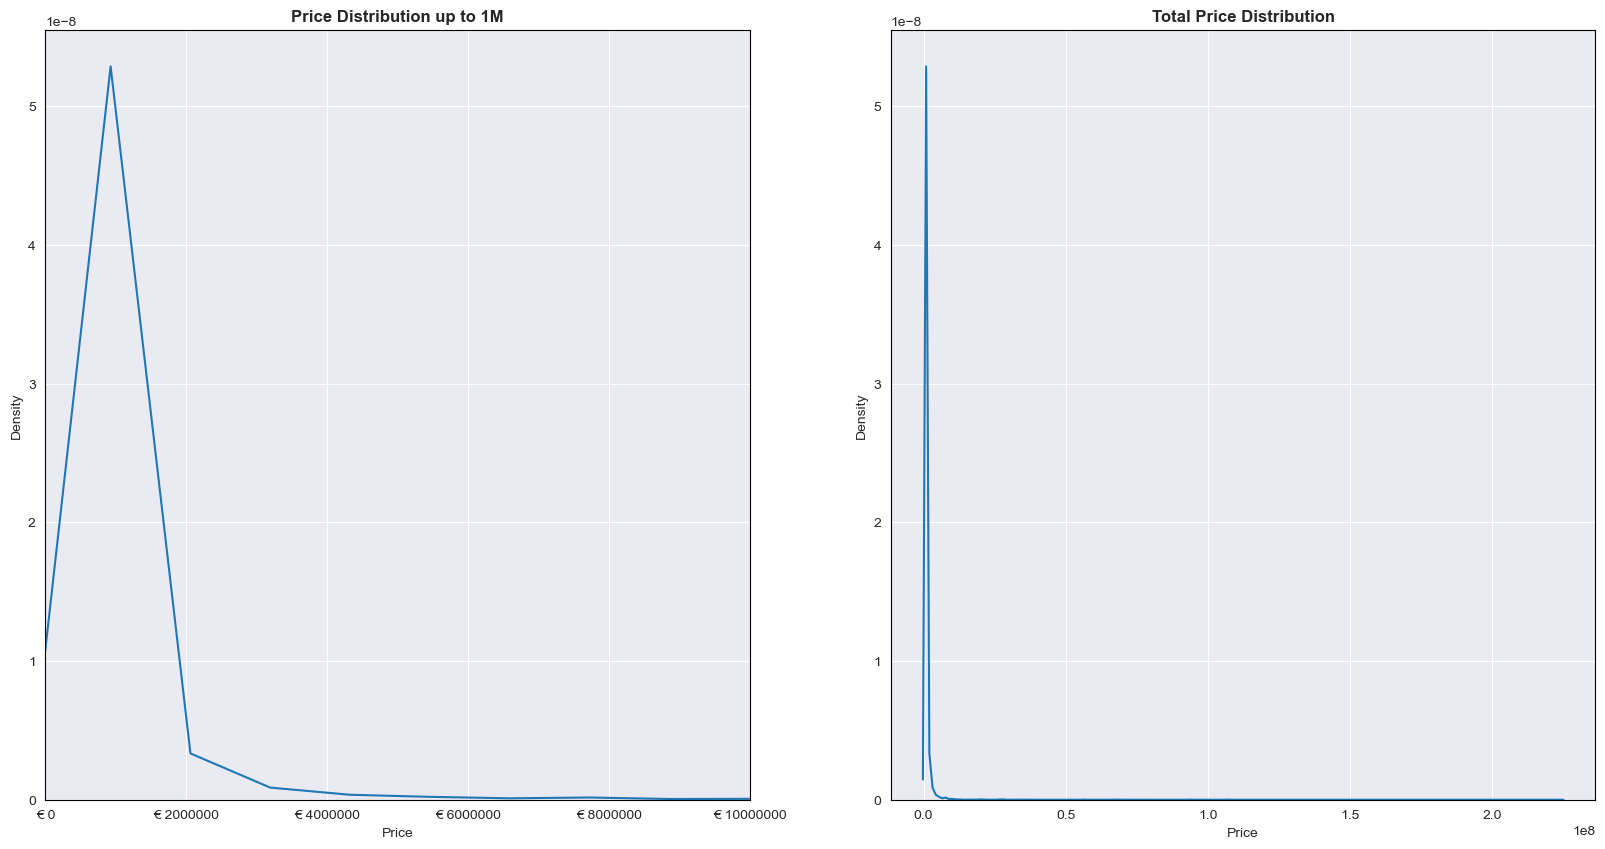

In [337]:
import seaborn as sns

f, axes = plt.subplots(ncols=2, nrows=1,figsize=(20, 10))

plott = sns.kdeplot(df['Price'], ax=axes[0])
plott.set_title('Price Distribution up to 1M', fontweight='bold')
plott.ticklabel_format(style='plain', axis='x')
plott.xaxis.set_major_formatter('€ {x:1.0f}')
plott.set_xlim([0, 10000000])

plott2 = sns.kdeplot(df['Price'], ax=axes[1])
plott2.set_title('Total Price Distribution', fontweight='bold')

plt.show()


In [338]:
from scipy.stats import shapiro,kstest,mannwhitneyu
for x in [df[df['Description of Property'] == 'Second-Hand'],df[df['Description of Property'] == 'New'] ]:
    stat, p = kstest(x['Price'],'norm')
    stat, p2 = shapiro(x['Price'])
    if p>0.05 or p2>0.05:
        print('accept H0')
    else:
        print('reject H0')

    

reject H0
reject H0


c:\Users\santi\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [339]:
secon = df[df['Description of Property'] == 'Second-Hand']
new = df[df['Description of Property'] == 'New']

In [340]:
mannwhitneyu(secon['Price'],new['Price'])

MannwhitneyuResult(statistic=19497997286.0, pvalue=0.0)

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 597767 entries, 0 to 597767
Data columns (total 4 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Address                  597767 non-null  object 
 1   County                   597767 non-null  object 
 2   Price                    597767 non-null  float64
 3   Description of Property  597767 non-null  object 
dtypes: float64(1), object(3)
memory usage: 22.8+ MB


In [343]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer


vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the text column
bag_of_words = vectorizer.fit_transform(df['Address'])
type(bag_of_words)

# Convert the bag_of_words to a DataFrame
bag_of_words_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())

# Concatenate the desired columns with the bag_of_words DataFrame
df = pd.concat([df, bag_of_words_df], axis=1)

(597767, 1000)


In [348]:
df.head()

,Address,County,Price,Description of Property,abbey,abbeyfeale,abbeylands,abbeyleix,abbeyside,abhainn,...,woodlands,woodlawn,woods,woodside,woodview,woodville,wyckham,yard,yellow,youghal
0,BRAEMOR DRIVE CHURCHTOWN CO.DUBLIN,Dublin,343000.0,Second-Hand,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ASHEWOOD WALK SUMMERHILL LANE PORTLAOISE,Laois,185000.0,New,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,MEADOW AVENUE DUNDRUM DUBLIN,Dublin,438500.0,Second-Hand,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,THE HAVEN MORNINGTON,Meath,400000.0,Second-Hand,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,MELVILLE HEIGHTS KILKENNY,Kilkenny,160000.0,Second-Hand,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [352]:
df = pd.get_dummies(df,columns=['County'])

In [354]:
df.head()

,Address,Price,Description of Property,abbey,abbeyfeale,abbeylands,abbeyleix,abbeyside,abhainn,achill,...,County_Meath,County_Monaghan,County_Offaly,County_Roscommon,County_Sligo,County_Tipperary,County_Waterford,County_Westmeath,County_Wexford,County_Wicklow
0,BRAEMOR DRIVE CHURCHTOWN CO.DUBLIN,343000.0,Second-Hand,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,ASHEWOOD WALK SUMMERHILL LANE PORTLAOISE,185000.0,New,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,MEADOW AVENUE DUNDRUM DUBLIN,438500.0,Second-Hand,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,THE HAVEN MORNINGTON,400000.0,Second-Hand,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,MELVILLE HEIGHTS KILKENNY,160000.0,Second-Hand,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [349]:
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
        remainder='passthrough', #passthough features not listed
        transformers=[('std', RobustScaler , ['Price'])])

df['Price'] = trans.fit_transform(df['Price'])

ValueError: Expected 2D array, got 1D array instead:
array=[ 343000.  185000.  438500. ... 1055000.  340000.      nan].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.